### とにかく「shit + Enter」を押していくと、上から実行していきます。


In [90]:
# 計算できます。「#」以下は無視されます。
1+2

3

In [91]:
# 代入できます。最後の行だけ出力が見えます。
a = 2
b = 3
a**b # これは２の３乗という意味です。

8

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
[ 3.    3.02  3.08  3.18  3.32  3.5   3.72  3.98  4.28  4.62  5.    5.42
  5.88  6.38  6.92  7.5   8.12  8.78  9.48 10.22 11.   11.82 12.68 13.58
 14.52 15.5  16.52 17.58 18.68 19.82]


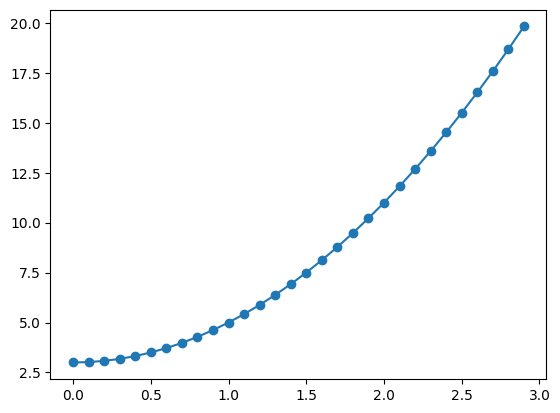

In [92]:
# 便利な関数たちを呼び出して使えます。
import numpy as np # 数値計算用（Numerical Pythonの略）
import matplotlib.pyplot as plt  # グラフプロット用

x = np.arange(0, 3, 0.1) #0から3まで0.1刻み。3は含まれないことに注意。
y = a*(x**2) + b
plt.plot( x, y , 'o-' )
print(x)  # printをつけると最後の行じゃなくても出力します。
print(y)  # printをつけると最後の行じゃなくても出力します。


### いきなりですが、データを統計解析してみます


In [93]:
# そのままではimportできないモジュール（関数たち）をインストールします
!pip install scikit-posthocs

In [94]:
# import
import os
import pandas as pd
import seaborn as sns
import scipy # pip install scipy
import statsmodels # pip install statsmodels
import scikit_posthocs # pip install scikit-posthocs

In [95]:
# データファイルを読み込みます。まずはMatrix形式のデータです。
# 細かいことはおいといて、各時間に、７人の人の血圧と、その時の室温のデータが入っているとします。

url = 'https://raw.githubusercontent.com/hosodakazufumi/note/main/data/data_matrix.csv'
xmat = pd.read_csv(url)

xmat


,time,name0,name1,name2,name3,name4,name5,name6,room_temp
0,0,66.260000,86.990000,80.570000,66.230000,87.380000,65.600000,74.930000,20.300000
1,2,64.037952,88.125488,78.643391,67.020812,89.267530,68.492891,71.185896,21.367760
2,4,66.084142,87.936356,80.123808,66.202297,88.100383,66.353962,72.416365,22.102321
3,6,70.389389,85.844614,83.687399,64.589934,84.594516,61.192709,76.588876,22.291663
4,8,74.460032,83.683739,86.309413,63.556247,81.359299,56.302790,80.308437,21.786020
...,...,...,...,...,...,...,...,...,...
95,190,68.862341,88.072094,80.875399,66.835952,87.364838,65.658903,68.537143,29.528122
96,192,64.709356,89.750637,77.580278,68.349284,90.837557,70.125525,64.509043,29.569105
97,194,61.316202,91.385161,74.313203,69.336714,93.971811,74.543048,59.998562,29.932500
98,196,59.330314,92.690517,72.370003,69.766914,95.912817,76.909765,57.742184,30.148723


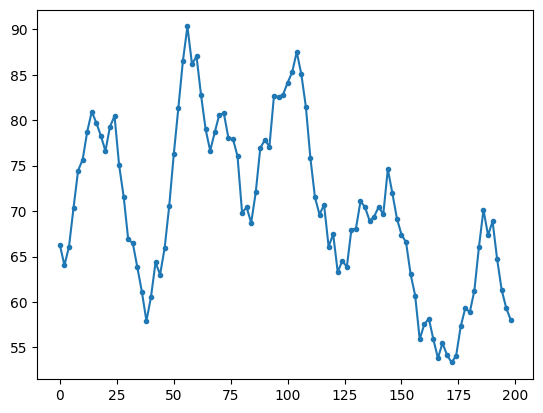

In [96]:
# 一人分+室温、Plotしてみましょう
x = xmat['time']
y = xmat['name0']
plt.plot( x, y, '.-' )

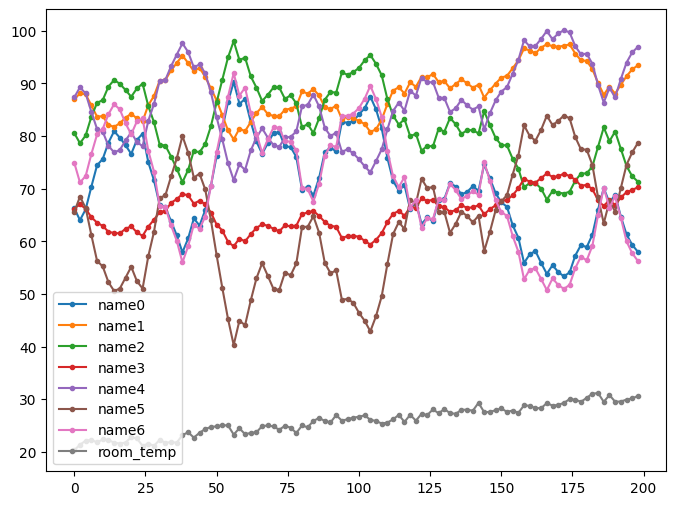

In [97]:
# 全てのデータをPlotしてみます。

fig = plt.figure( figsize=(8,6) )
x = xmat.iloc[:,0]
for i in np.arange( 1, len(xmat.columns) ):
    y = xmat.iloc[:,i]
    plt.plot( x, y, '.-' , label=xmat.columns[i])
plt.legend()


In [98]:
######################################################################################
######################################################################################
# とりあえず、二人の比較をしてみましょう （仮に時系列ということは忘れたとして）
######################################################################################
######################################################################################

data数、A.shape = (100,)
平均、A mean= 65.65143138970001
平均、B mean= 63.20098165779999


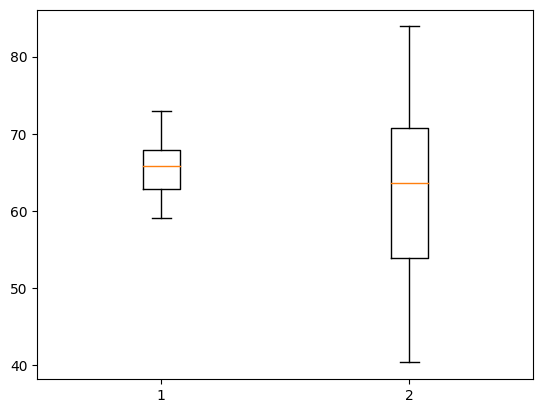

In [99]:
# 割と平均値が似ているname3と5を比較してみましょう
A = xmat['name3'].values
B = xmat['name5'].values

plt.boxplot([A,B])
print( 'data数、A.shape =' , A.shape)
print('平均、A mean=', A.mean())
print('平均、B mean=', B.mean())


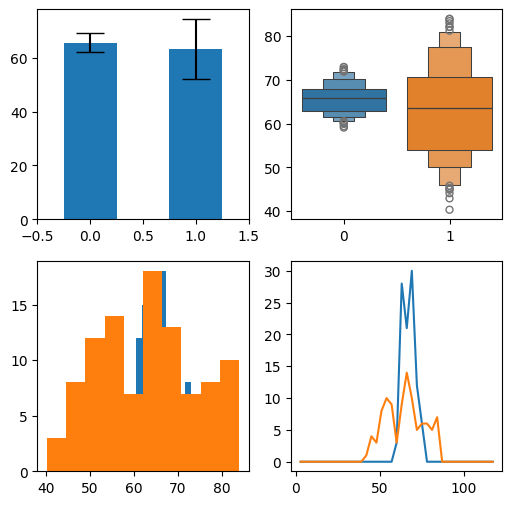

In [100]:
# いろんなグラフがかけます。
plt.figure(figsize=(6,6))

# Bar with Errorbar
plt.subplot(2,2,1)
plt.bar([0,1], [A.mean(),B.mean()], width=0.5)
plt.errorbar( [0,1], [A.mean(),B.mean()], yerr = [A.std(),B.std()], fmt='.',
             markersize=0, ecolor='black', capsize=10)
plt.xlim([-0.5,1.5])

# Letter-value plot
plt.subplot(2,2,2)
x = np.zeros([len(A),2])
x[:,0] = A
x[:,1] = B
sns.boxenplot( data=x )

# Histogram
plt.subplot(2,2,3)
plt.hist(A)
plt.hist(B)

# Histogram　ちゃんとカウントしてから
plt.subplot(2,2,4)
x = np.arange(0,120,3)
y = np.histogram(A, bins=x)[0]
plt.plot( x[1:], y)
y = np.histogram(B, bins=x)[0]
plt.plot( x[1:], y)


In [101]:
# 平均値の差を検定
# WelchのT検定（これは論文でも使えます）
scipy.stats.ttest_ind(A, B)
# 以下のように、明示的に指示することを推奨します。
scipy.stats.ttest_ind(A, B, equal_var=False)


TtestResult(statistic=2.081281755904602, pvalue=0.03955603639847937, df=118.81585348815582)

In [102]:
# StudentのT検定（※基本的につかわない。データ数が非常に少ない時ぐらい？）
scipy.stats.ttest_ind(A, B, equal_var=True)

TtestResult(statistic=2.0812817559046017, pvalue=0.03869420744478965, df=198.0)

In [103]:
# 各日での差を検定する場合(paired-t-test)
scipy.stats.ttest_rel(A, B)

TtestResult(statistic=3.169511864846574, pvalue=0.0020320501966828858, df=99)

In [104]:
# ノンパラメトリック検定
scipy.stats.mannwhitneyu(A, B)

MannwhitneyuResult(statistic=5691.0, pvalue=0.09157258537979468)

In [105]:
# 各日での差をノンパラメトリック検定する場合
scipy.stats.wilcoxon(A, B)

WilcoxonResult(statistic=1677.0, pvalue=0.003548921708441747)

In [106]:
# 全部まとめて
print('Welch t: P =', scipy.stats.ttest_ind(A, B, equal_var=False).pvalue.round(3) )
print('Student t: P =', scipy.stats.ttest_ind(A, B, equal_var=True).pvalue.round(3) )
print('Paired t: P =', scipy.stats.ttest_rel(A, B).pvalue.round(3) )
print('Mannwhitneyu: P =', scipy.stats.mannwhitneyu(A, B).pvalue.round(3) )
print('Wilcoxon: P =', scipy.stats.wilcoxon(A, B).pvalue.round(3) )


Welch t: P = 0.04
Student t: P = 0.039
Paired t: P = 0.002
Mannwhitneyu: P = 0.092
Wilcoxon: P = 0.004


R and p = PearsonRResult(statistic=0.9848650589674948, pvalue=2.087287565432266e-76)
Numpy R = 0.9848650589674954


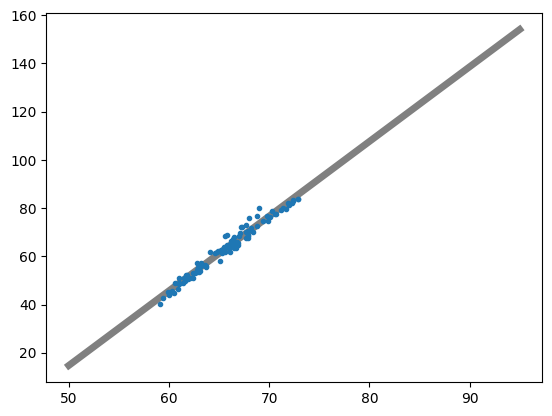

In [107]:
# 相関が有意であるかを調べてみます(significant, p<a)。
plt.plot( A, B, '.' )
z = scipy.stats.pearsonr(A, B)
print('R and p =',z)
print('Numpy R =', np.corrcoef(A,B)[0,1])

linear_fit = np.poly1d( np.polyfit( A, B, 1 ) )
x = np.linspace(50, 95, 100)
plt.plot(x, linear_fit(x), color='gray', linewidth=5, zorder=-1)


In [108]:
######################################################################################
######################################################################################
# 統計検定　全ての組み合わせ。
######################################################################################
######################################################################################

(100, 7)


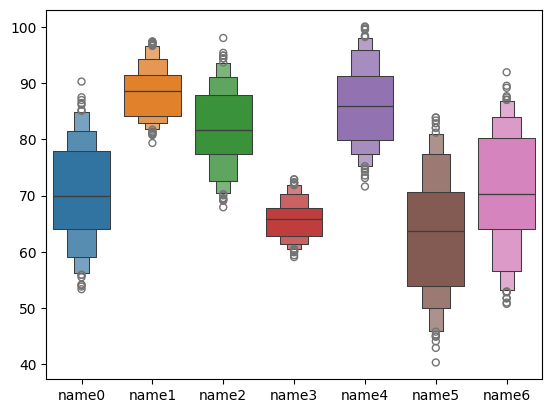

In [109]:
# 仮に時系列を忘れたとして、各人の平均値には差があるか？
x = xmat.iloc[:,1:-1]
sns.boxenplot( data=x )
print(x.shape)


In [110]:
# 間違えた検定
# これまでのように、全部の組み合わせでWelchをしてみる。※これは多重検定になるのでダメ！
M = 7 #人数

pmatrix = np.zeros([M,M])
pmatrix[:,:] = np.nan

for i in range(M-1):
    for j in np.arange(i+1,M):
        A = xmat[f'name{i}'].values
        B = xmat[f'name{j}'].values
        pmatrix[i,j] = scipy.stats.ttest_ind(A, B, equal_var=False).pvalue.round(3)
        #print(f'P({i}, {j}) =', pmatrix[i,j] )

print(pmatrix)
print( pmatrix < 0.05 )


[[  nan 0.    0.    0.    0.    0.    0.76 ]
 [  nan   nan 0.    0.    0.009 0.    0.   ]
 [  nan   nan   nan 0.    0.    0.    0.   ]
 [  nan   nan   nan   nan 0.    0.04  0.   ]
 [  nan   nan   nan   nan   nan 0.    0.   ]
 [  nan   nan   nan   nan   nan   nan 0.   ]
 [  nan   nan   nan   nan   nan   nan   nan]]
[[False  True  True  True  True  True False]
 [False False  True  True  True  True  True]
 [False False False  True  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False False False False False  True]
 [False False False False False False False]]


In [111]:
# 上記の間違えた検定を、多重検定補正する
# Bonferroni 補正 （単純にα値を検定の回数で割るだけ）
# ※これは論文で使える。ただし多重補正としては最も厳しいので十分に差がある時にのみ使用される。
ncr = scipy.special.comb( 7, 2 )
print( pmatrix < (0.05/ncr) )


[[False  True  True  True  True  True False]
 [False False  True  True False  True  True]
 [False False False  True  True  True  True]
 [False False False False  True False  True]
 [False False False False False  True  True]
 [False False False False False False  True]
 [False False False False False False False]]


In [112]:
# 以下、便利なツールを使用するために、データをquery形式に変換します。
print(xmat.shape)
N = xmat.shape[0]
M = 7 #人数

xq = pd.DataFrame( np.zeros([N*M,2]) )
for i in range(M):
    #xq.iloc[ (i*N) : ((i+1)*N) , 0 ] = xmat.columns[i+1]
    xq.iloc[ (i*N) : ((i+1)*N) , 0 ] = i
    xq.iloc[ (i*N) : ((i+1)*N) , 1 ] = xmat.iloc[:,i+1]

xq.columns = ['name', 'BP']
print(xq)


(100, 9)
     name         BP
0     0.0  66.260000
1     0.0  64.037952
2     0.0  66.084142
3     0.0  70.389389
4     0.0  74.460032
..    ...        ...
695   6.0  68.537143
696   6.0  64.509043
697   6.0  59.998562
698   6.0  57.742184
699   6.0  56.263787

[700 rows x 2 columns]


In [113]:
# tukeyhsd  ※これは論文でも使われます（ただし等分散を仮定しています）
z = statsmodels.stats.multicomp.pairwise_tukeyhsd(xq['BP'], xq['name'], alpha=0.05)
print(z)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   0.0    1.0  17.9588    0.0  14.5371  21.3805   True
   0.0    2.0  11.5979    0.0   8.1762  15.0196   True
   0.0    3.0  -4.8868 0.0005  -8.3085  -1.4652   True
   0.0    4.0  15.6391    0.0  12.2174  19.0607   True
   0.0    5.0  -7.3373    0.0  -10.759  -3.9156   True
   0.0    6.0   0.4313 0.9998  -2.9903    3.853  False
   1.0    2.0  -6.3609    0.0  -9.7826  -2.9392   True
   1.0    3.0 -22.8456    0.0 -26.2673  -19.424   True
   1.0    4.0  -2.3198 0.4125  -5.7414   1.1019  False
   1.0    5.0 -25.2961    0.0 -28.7178 -21.8744   True
   1.0    6.0 -17.5275    0.0 -20.9492 -14.1058   True
   2.0    3.0 -16.4847    0.0 -19.9064 -13.0631   True
   2.0    4.0   4.0411 0.0092   0.6195   7.4628   True
   2.0    5.0 -18.9352    0.0 -22.3569 -15.5135   True
   2.0    6.0 -11.1666    0.0 -14.5883  -7.7449   True
   3.0    

In [114]:
# Steel-Dwass-Critchlow-Fligner
# ※これはノンパラメトリックなので等分散どころか正規分布も仮定していない。
# つまり、どんな分布の場合にも適用できるけど、最も厳しい
z = scikit_posthocs.posthoc_dscf(xq, val_col='BP', group_col='name')
print( 'alpha = 5%' )
print( z < 0.05 )
print( 'alpha = 1%' )
print( z < 0.01 )


alpha = 5%
       0.0    1.0    2.0    3.0    4.0    5.0    6.0
0.0  False   True   True   True   True   True  False
1.0   True  False   True   True  False   True   True
2.0   True   True  False   True   True   True   True
3.0   True   True   True  False   True  False   True
4.0   True  False   True   True  False   True   True
5.0   True   True   True  False   True  False   True
6.0  False   True   True   True   True   True  False
alpha = 1%
       0.0    1.0    2.0    3.0    4.0    5.0    6.0
0.0  False   True   True   True   True   True  False
1.0   True  False   True   True  False   True   True
2.0   True   True  False   True  False   True   True
3.0   True   True   True  False   True  False   True
4.0   True  False  False   True  False   True   True
5.0   True   True   True  False   True  False   True
6.0  False   True   True   True   True   True  False


In [115]:
######################################################################################
######################################################################################
# もともとQuery形式のデータの場合
######################################################################################
######################################################################################

In [116]:
# データファイルを読み込みます。次はQuery形式のデータです。
# 各行に、名前、性別、薬を投与したか否か、時間、その時の室温、血圧、体温が入っているとします。
# このようにMatrixだと変数が限られますが、Query形式だと多次元のデータをいくらでも同じ形で入れることができます。
import pandas as pd

url = 'https://raw.githubusercontent.com/hosodakazufumi/note/main/data/data_query.csv'
xquery = pd.read_csv(url)

xquery


,name,sex,medicine,time,roomtemp,BP,BT
0,name0,F,1,0,20.300000,66.260000,36.416017
1,name0,F,1,2,21.367760,64.037952,36.268486
2,name0,F,1,4,22.102321,66.084142,36.335102
3,name0,F,1,6,22.291663,70.389389,36.479434
4,name0,F,1,8,21.786020,74.460032,37.004032
...,...,...,...,...,...,...,...
695,name6,M,0,190,29.528122,68.537143,36.578180
696,name6,M,0,192,29.569105,64.509043,36.429984
697,name6,M,0,194,29.932500,59.998562,35.971762
698,name6,M,0,196,30.148723,57.742184,36.272385


       name0  name1  name2  name3  name4  name5  name6
name0  False   True   True   True   True   True  False
name1   True  False   True   True  False   True   True
name2   True   True  False   True   True   True   True
name3   True   True   True  False   True  False   True
name4   True  False   True   True  False   True   True
name5   True   True   True  False   True  False   True
name6  False   True   True   True   True   True  False


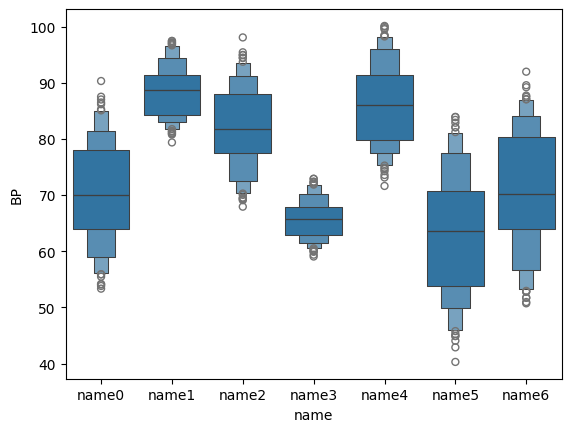

In [117]:
# とりあえず血圧のグラフと検定
sns.boxenplot(data=xquery, x='name', y='BP')

# Steel-Dwass-Critchlow-Fligner
z = scikit_posthocs.posthoc_dscf(xquery, val_col='BP', group_col='name')
print( z < 0.05 )



In [118]:
# 同じことを、体温BTについてもやってみましょう。
z = scikit_posthocs.posthoc_dscf(xquery, val_col='BT', group_col='name')
print( z < 0.05 )


       name0  name1  name2  name3  name4  name5  name6
name0  False   True   True  False   True   True  False
name1   True  False   True   True  False   True   True
name2   True   True  False   True   True   True   True
name3  False   True   True  False   True  False   True
name4   True  False   True   True  False   True   True
name5   True   True   True  False   True  False   True
name6  False   True   True   True   True   True  False


In [119]:
# 同じことを、投薬の有無などについてもやってみましょう。。
# 二種類なので多重検定にしなくてもいいです。
A = xquery[ (xquery['medicine'] == 0) ]['BP'].values
B = xquery[ (xquery['medicine'] == 1) ]['BP'].values
print('Welch t: P =', scipy.stats.ttest_ind(A, B, equal_var=False).pvalue.round(3) )
print('Student t: P =', scipy.stats.ttest_ind(A, B, equal_var=True).pvalue.round(3) )
print('Mannwhitneyu: P =', scipy.stats.mannwhitneyu(A, B).pvalue.round(3) )


Welch t: P = 0.122
Student t: P = 0.168
Mannwhitneyu: P = 0.253
